# Exploring Flight Dataset To investigate reasons for delaying and cancelling flights

## by Mahmoud El-Sayed

## Preliminary Wrangling

> This dataset has info about 294237 plane flights from June, 2003 to  January, 2021  in the united states like the departure time, flight durtion and reason for cancellation which we can ask alot of questions and gain alot of insights. BTS(Bureau of Transportation Statistics) began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.

In [552]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [553]:
#importing dataset and seeing 10 samples
flights = pd.read_csv('flights.csv')
flights.sample(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
85994,2020,1,9E,Endeavor Air Inc.,MDW,"Chicago, IL: Chicago Midway International",24.0,1.0,0.00,1.00,...,0.00,1.0,0.0,90.0,0.0,90.0,0.0,0.0,0.0,NaN
61395,2018,11,G4,Allegiant Air,CVG,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",257.0,84.0,17.54,1.00,...,50.10,0.0,0.0,6972.0,1676.0,25.0,680.0,0.0,4591.0,NaN
23170,2010,9,9E,Pinnacle Airlines Inc.,FSM,"Fort Smith, AR: Fort Smith Regional",88.0,10.0,3.99,0.38,...,3.99,1.0,0.0,622.0,264.0,6.0,30.0,0.0,322.0,NaN
57614,2011,6,MQ,American Eagle Airlines Inc.,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",60.0,8.0,3.91,0.00,...,1.77,1.0,0.0,248.0,137.0,0.0,57.0,0.0,54.0,NaN
29916,2012,10,MQ,American Eagle Airlines Inc.,DAY,"Dayton, OH: James M Cox/Dayton International",120.0,23.0,4.16,0.94,...,8.91,3.0,0.0,1044.0,160.0,17.0,382.0,0.0,485.0,NaN
182657,2017,10,AS,Alaska Airlines Inc.,BET,"Bethel, AK: Bethel Airport",84.0,7.0,2.46,0.00,...,3.15,2.0,0.0,748.0,121.0,0.0,36.0,0.0,591.0,NaN
176819,2008,8,WN,Southwest Airlines Co.,MAF,"Midland/Odessa, TX: Midland International Air ...",316.0,57.0,16.45,0.70,...,34.58,0.0,0.0,2457.0,689.0,37.0,200.0,0.0,1531.0,NaN
126491,2003,11,EV,Atlantic Southeast Airlines,MKE,"Milwaukee, WI: General Mitchell International",30.0,7.0,0.81,0.68,...,4.01,1.0,0.0,343.0,55.0,53.0,88.0,0.0,147.0,NaN
249525,2010,8,DL,Delta Air Lines Inc.,BOI,"Boise, ID: Boise Air Terminal",89.0,26.0,11.65,0.24,...,9.08,0.0,0.0,1010.0,503.0,17.0,154.0,0.0,336.0,NaN
280491,2007,12,DL,Delta Air Lines Inc.,JAX,"Jacksonville, FL: Jacksonville International",331.0,84.0,36.05,3.91,...,27.00,0.0,0.0,3335.0,1535.0,157.0,535.0,0.0,1108.0,NaN


In [554]:
#getting info
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294237 entries, 0 to 294236
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 294237 non-null  int64  
 1    month               294237 non-null  int64  
 2   carrier              294237 non-null  object 
 3   carrier_name         294237 non-null  object 
 4   airport              294237 non-null  object 
 5   airport_name         294237 non-null  object 
 6   arr_flights          293774 non-null  float64
 7   arr_del15            293548 non-null  float64
 8   carrier_ct           293774 non-null  float64
 9    weather_ct          293774 non-null  float64
 10  nas_ct               293774 non-null  float64
 11  security_ct          293774 non-null  float64
 12  late_aircraft_ct     293774 non-null  float64
 13  arr_cancelled        293774 non-null  float64
 14  arr_diverted         293774 non-null  float64
 15   arr_delay       

In [555]:
#getting shape
flights.shape

(294237, 22)

## Data Wrangling

#### Now that i have a glimpse of the dataset and its features now i have to wrangle the data to clean it up
#### I noticed a faulty column that needs to be removed for starters

In [556]:
#dropping faulty column with all Nans
flights.drop(['Unnamed: 21'],axis = 1,inplace = True)
#checking if it is removed correctly
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294237 entries, 0 to 294236
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 294237 non-null  int64  
 1    month               294237 non-null  int64  
 2   carrier              294237 non-null  object 
 3   carrier_name         294237 non-null  object 
 4   airport              294237 non-null  object 
 5   airport_name         294237 non-null  object 
 6   arr_flights          293774 non-null  float64
 7   arr_del15            293548 non-null  float64
 8   carrier_ct           293774 non-null  float64
 9    weather_ct          293774 non-null  float64
 10  nas_ct               293774 non-null  float64
 11  security_ct          293774 non-null  float64
 12  late_aircraft_ct     293774 non-null  float64
 13  arr_cancelled        293774 non-null  float64
 14  arr_diverted         293774 non-null  float64
 15   arr_delay       

#### checking for duplicated and nulls

In [557]:
flights.duplicated().sum()

0

In [558]:
flights.isnull().sum()

year                     0
 month                   0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            463
arr_del15              689
carrier_ct             463
 weather_ct            463
nas_ct                 463
security_ct            463
late_aircraft_ct       463
arr_cancelled          463
arr_diverted           463
 arr_delay             463
 carrier_delay         463
weather_delay          463
nas_delay              463
security_delay         463
late_aircraft_delay    463
dtype: int64

#### I think its safe to drop the nulls as they are very small in number compared to the total number of observations

In [559]:
flights.dropna(inplace = True)
flights.isnull().sum()

year                   0
 month                 0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
 weather_ct            0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
 arr_delay             0
 carrier_delay         0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [560]:
#checking columns
flights.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

#### Renaming columns to better describe their values

In [561]:
flights.rename(columns = {'arr_del15':'arr_del15_count',
                         'carrier_ct': 'carrier_count',
                         'weather_ct': 'weather_count',
                         'nas_ct': 'nas_count',
                         'security_ct': 'security_count',
                         'late_aircraft_ct': 'late_aircraft_count',
                         'arr_cancelled': 'arr_cancelled_count',
                         'arr_diverted': 'ar_diverted_count',
                         ' weather_ct': 'weather_count'},inplace = True)
flights.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15_count', 'carrier_count', 'weather_count',
       'nas_count', 'security_count', 'late_aircraft_count',
       'arr_cancelled_count', 'ar_diverted_count', ' arr_delay',
       ' carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

### What is the structure of your dataset?

> this dataset contain 294237 rows of flight info having 22 column most of them are numeric except {carrier,carrier_name,airport,airport_name} and 1 faulty column that needs to be removed 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in knowing the reasons for flight delays and cancellations (weather)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Certainly, Features like carrier_delay, weather_delay, security_delay,arr_cancelled, my main point of interest will be weather as i think its the reason for most flight delays

## Univariate Exploration

> first we will begin with looking at flights arriving on time and i will be using histograms in univariate explorations

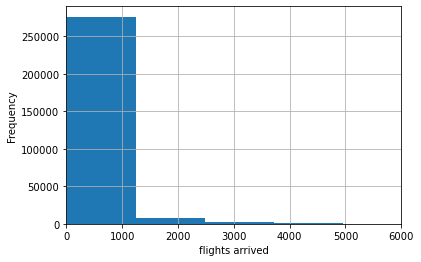

In [591]:
#plotting histogram for arr_flights feature
flights['arr_flights'].hist();
plt.xlim(0,6000)
plt.xlabel('flights arrived')
plt.ylabel('Frequency');

### we can modify the bin sizes to make the histogram more readable

Text(0, 0.5, 'Frequency')

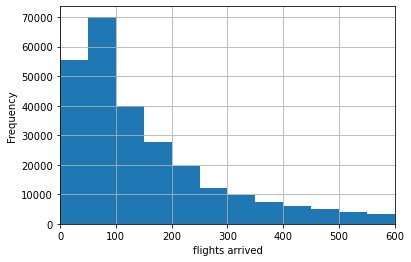

In [563]:
# modifying bin sizes 
bins = np.arange(0,flights.arr_flights.max() + 50,50)
flights['arr_flights'].hist(bins = bins);
#limiting x axis to focus on area of interest
plt.xlim(0,600)
#labeling x and y axis
plt.xlabel('flights arrived')
plt.ylabel('Frequency')

In [564]:
### taking a look at the mean of the arrived flights
flights.arr_flights.describe()

count    293548.000000
mean        387.531457
std        1038.511278
min           1.000000
25%          60.000000
50%         123.000000
75%         278.000000
max       21977.000000
Name: arr_flights, dtype: float64

#### This histogram shows the number of flights arrived on time in the dataset which the graph show is right skewed 
#### now after investigating the flights arrived on time lets take a closer look at the delayed flights by 15 minutes

Text(0, 0.5, 'Frequency')

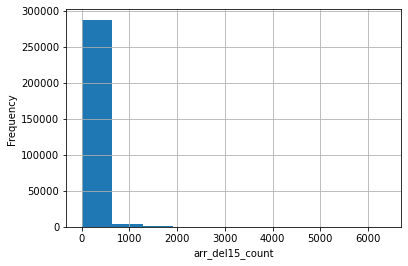

In [565]:
flights['arr_del15_count'].hist();
plt.xlabel('arr_del15_count')
plt.ylabel('Frequency')

#### form the histogram there seems to be outliers that needs to be removed

In [566]:
#filtering the dataset to get the outlier then dropping those rows
flights.drop(flights.query('arr_del15_count > 600').index,inplace = True)
flights.shape

(286874, 21)

In [567]:
#looking at the mean
flights.arr_del15_count.describe()

count    286874.000000
mean         49.348379
std          78.754903
min           0.000000
25%           9.000000
50%          23.000000
75%          53.000000
max         600.000000
Name: arr_del15_count, dtype: float64

Text(0, 0.5, 'Frequency')

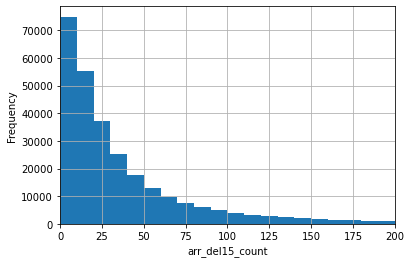

In [568]:
flights['arr_del15_count'].hist(bins = np.arange(0,flights['arr_del15_count'].max()+10,10));
plt.xlim(0,200)
plt.xlabel('arr_del15_count')
plt.ylabel('Frequency')


#### another right skewed histogram with a mean of approximately 49
#### lets take a look at other delays features

In [569]:
flights['weather_delay'].describe()

count    286874.000000
mean        151.425075
std         383.389006
min           0.000000
25%           0.000000
50%          23.000000
75%         145.000000
max       15928.000000
Name: weather_delay, dtype: float64

Text(0.5, 0, 'weather_delay')

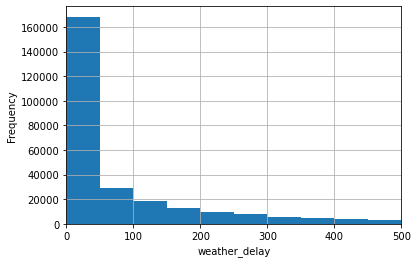

In [570]:
flights['weather_delay'].hist(bins = np.arange(0,flights['weather_delay'].max() + 50,50));
plt.xlim(0,500)
plt.ylabel('Frequency')
plt.xlabel('weather_delay')

#### rightly skewed histogram with a mean of 151,most of the weather delayed flights lies between 0 - 50, there seems to be outliers still but instead of removing rows i will be limiting the x-axis to focus on the area of interest

Text(0.5, 0, 'carrier_delay')

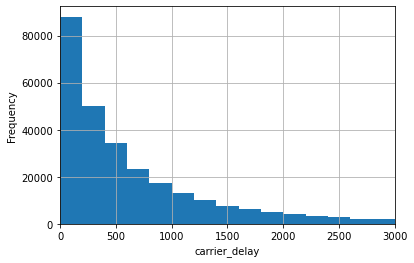

In [571]:
bins = np.arange(0,flights[' carrier_delay'].max() + 200,200)
flights[' carrier_delay'].hist(bins = bins);
plt.xlim(0,3000)
plt.ylabel('Frequency')
plt.xlabel('carrier_delay')

In [572]:
flights[' carrier_delay'].describe()

count    286874.000000
mean        897.401037
std        1471.472694
min           0.000000
25%         149.000000
50%         427.000000
75%        1025.000000
max       40710.000000
Name:  carrier_delay, dtype: float64

#### rightly skewed histogram showing that most carrier delays lies between 0 - 200

Text(0.5, 0, 'nas_delay')

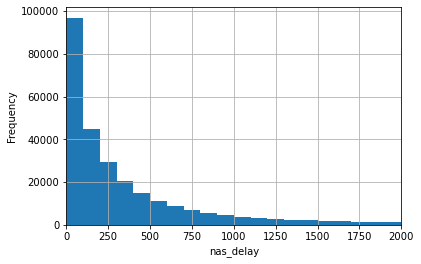

In [573]:
bins = np.arange(0,flights['nas_delay'].max()+100, 100)
flights['nas_delay'].hist(bins = bins)
plt.xlim(0,2000)
plt.ylabel('Frequency')
plt.xlabel('nas_delay')

#### rightly skewed histogram showing that most nas  delays lies between 0 - 100

Text(0.5, 0, 'security_delay')

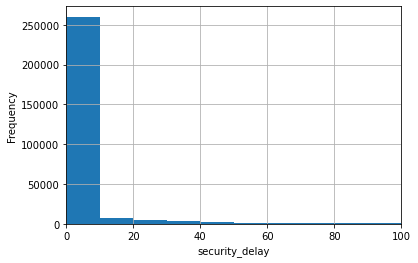

In [574]:
bins = np.arange(0,flights['security_delay'].max() + 10,10)
flights['security_delay'].hist(bins = bins)
plt.xlim(0,100)
plt.ylabel('Frequency')
plt.xlabel('security_delay')

#### rightly skewed histogram showing that most security delays lies between 0 - 10 

In [575]:
flights.security_delay.describe()

count    286874.000000
mean          4.745718
std          24.654086
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2236.000000
Name: security_delay, dtype: float64

Text(0.5, 0, 'nas_count')

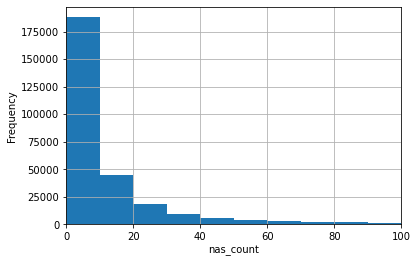

In [576]:
bins = np.arange(0,flights['nas_count'].max()+10,10)
flights['nas_count'].hist(bins = bins)
plt.xlim(0,100)
plt.ylabel('Frequency')
plt.xlabel('nas_count')

#### rightly skewed histogram showing that most nas count delays lies between 0 - 10

Text(0.5, 0, 'late_aircraft_count')

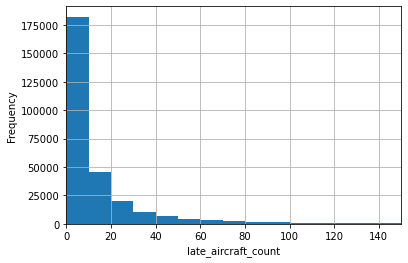

In [577]:
bins = np.arange(0,flights['late_aircraft_count'].max()+10,10)
flights['late_aircraft_count'].hist(bins= bins)
plt.xlim(0,150)
plt.ylabel('Frequency')
plt.xlabel('late_aircraft_count')

#### rightly skewed histogram showing that most late aircraft delays count lies between 0 - 10

Text(0.5, 0, 'weather_count')

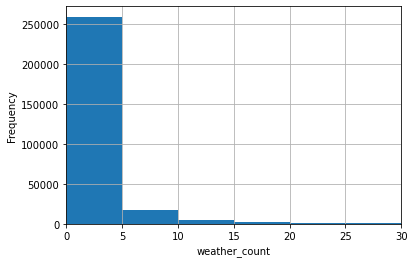

In [578]:
bins = np.arange(0,flights['weather_count'].max() + 5,5)
flights['weather_count'].hist(bins = bins)
plt.xlim(0,30)
plt.ylabel('Frequency')
plt.xlabel('weather_count')

### rightly skewed histogram showing that most late weather delays  lies between 0 - 5

Text(0.5, 0, 'late_aircraft_delay')

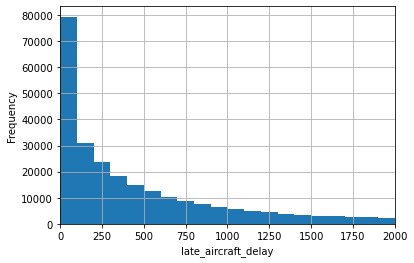

In [579]:
bins = np.arange(0, flights['late_aircraft_delay'].max()+100,100)
flights['late_aircraft_delay'].hist(bins = bins)
plt.xlim(0,2000)
plt.ylabel('Frequency')
plt.xlabel('late_aircraft_delay')

#### rightly skewed histogram showing that most late aircraft delays count lies between 0 - 100

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All the univariate exploration of the features of interest are rightly skewed(mean > mode), all the transofrmation needed was changing the bin sizes for better readibility and focusing on certain limits.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> no unusual distirbution.
> Yes, there was a fauty column that needed to be excluded,renaming columns, removing all nans from the dataset so they wont affect the graphs, removed outliers with unrealistic values to better view histogram

## Bivariate Exploration

> First i will draw a matrix of plots to see if there is any noticable patterns.

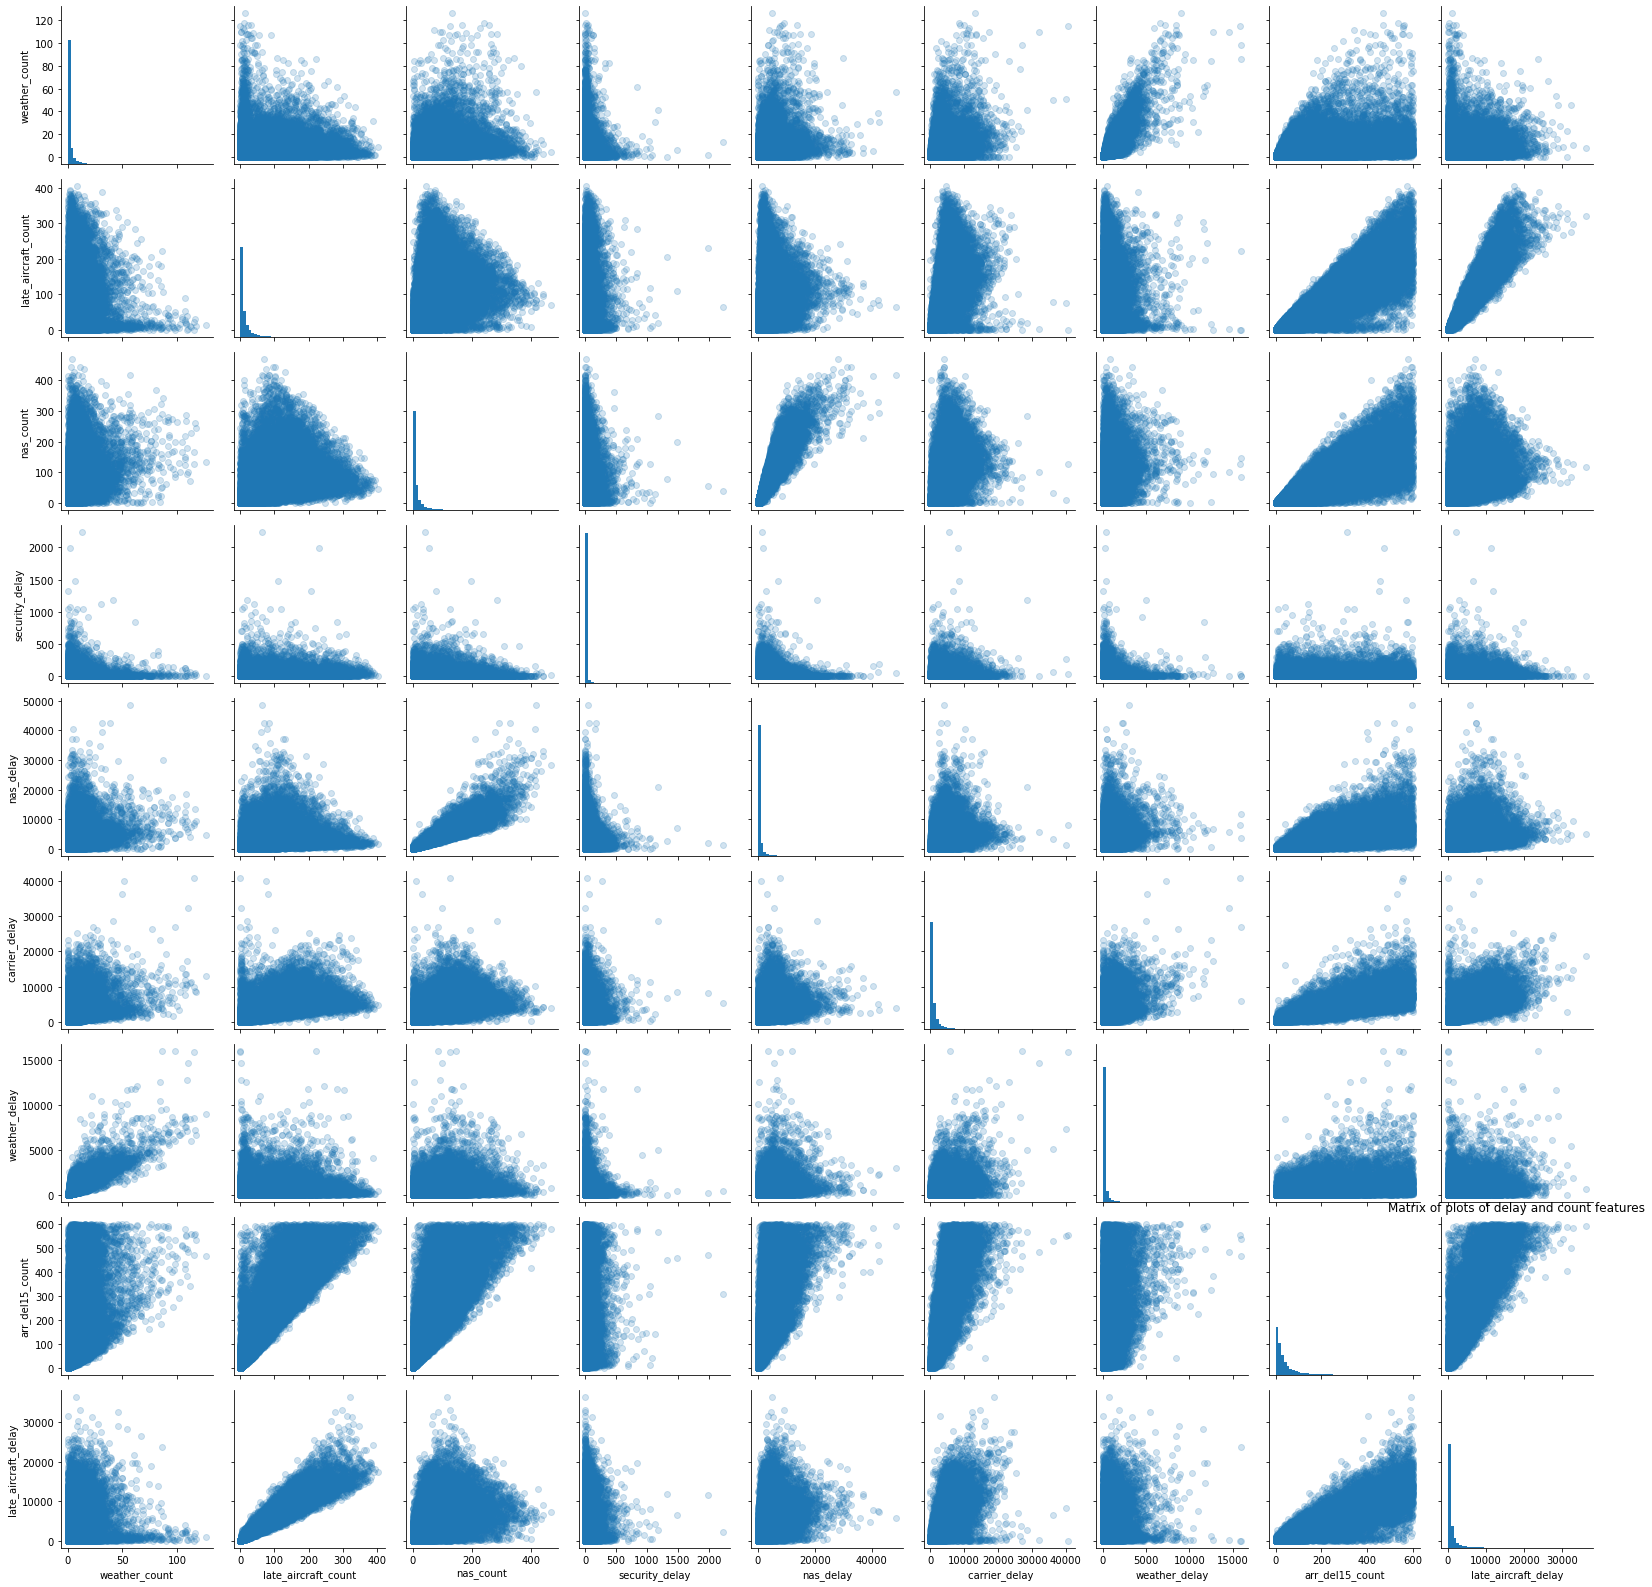

In [580]:
# getting the wanted features 
features = ['weather_count','late_aircraft_count','nas_count','security_delay','nas_delay',' carrier_delay',
            'weather_delay','arr_del15_count','late_aircraft_delay']
# drawing plots in pair grids
g = sb.PairGrid(data = flights,vars = features)
#diagonal plots are histograms
g = g.map_diag(plt.hist,bins = 50)
# off diagonals are scatter (which are the plots i wanna see the patterns in them)
g = g.map_offdiag(plt.scatter,alpha = 0.2)
plt.title('Matrix of plots of delay and count features');

### Patterns showing strong positive correlation between delay features with its coressponding count feature

#### Now i wanna see effects of weather on each state first i need to extract state name from airport_name column

No handles with labels found to put in legend.


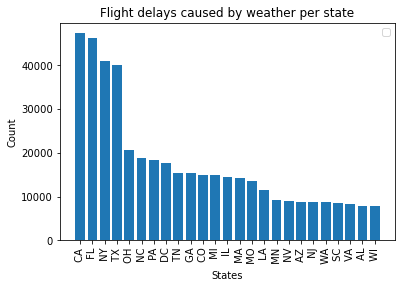

In [589]:
# extracting state name from airport name column 
flights['state'] = flights['airport_name'].str.split(',').str[-1].str.split(':').str[0]
flights_weather_cancel = flights[['state','weather_count']].groupby('state').sum().reset_index().sort_values('weather_count',ascending = False)
# getting the first most 25 states
flights_weather_cancel = flights_weather_cancel.iloc[:25]
# drawing  bar plot
plt.bar(flights_weather_cancel.state,flights_weather_cancel.weather_count)
#rotating the x axis labels se we can read them and polishing
plt.xticks(rotation = 90);
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Flight delays caused by weather per state');

### Texas state has the highest cancellation of flights due to weather 
> now lets take a look at weather effects per year on flights

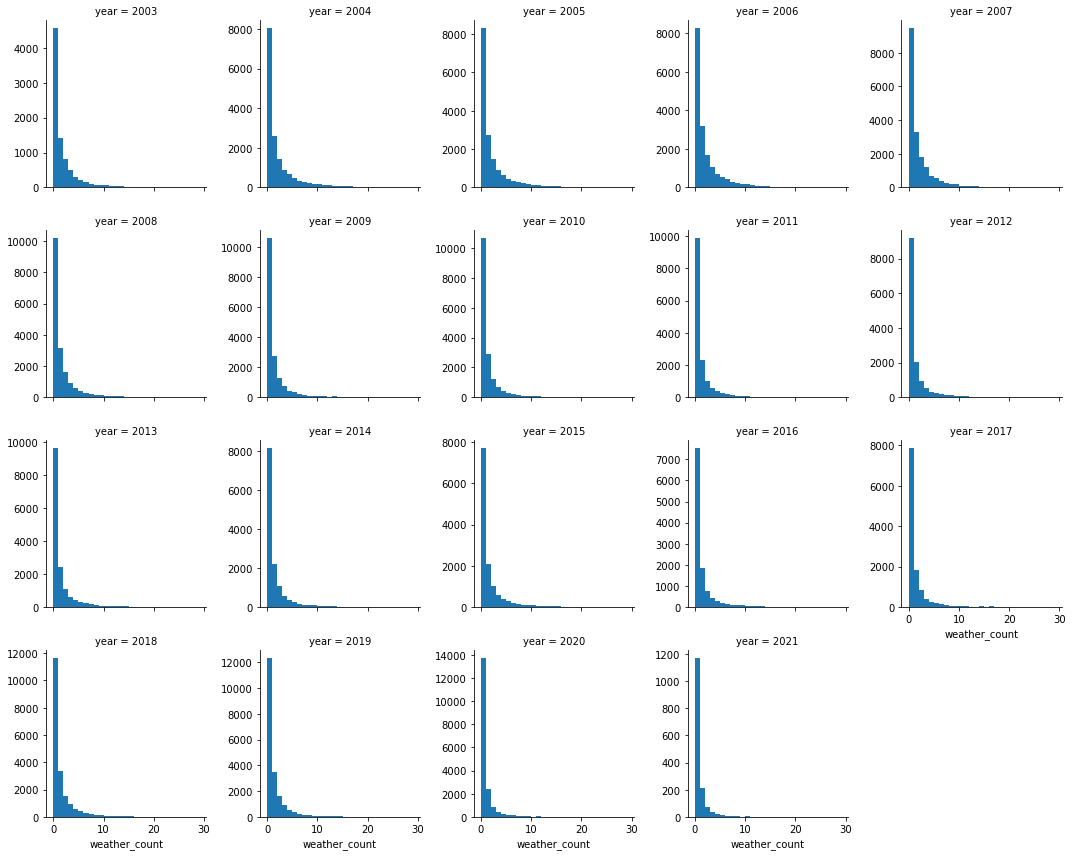

In [582]:
# plotting a facet grid of all the delayed weather flights to their year
g = sb.FacetGrid(data = flights,col = 'year', col_wrap = 5, height = 3,sharey = False)
bins = range(0,30,1)
# plotting histograms in the graphs
g.map(plt.hist,'weather_count',bins = bins);

### plot showing that weather delays counts are all rightly skewed in each year

In [583]:
# grouping weather caused total delay by month
flights_weather_month = flights[['weather_delay',' month']].groupby(' month').sum().reset_index()

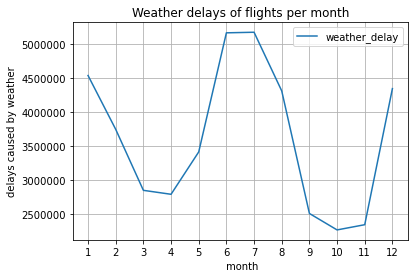

In [584]:
# plotting line plot 
flights_weather_month.plot(x =' month', y = 'weather_delay' )
plt.ylabel('delays caused by weather')
plt.xticks(range(1,13,1));
#making the numbers on the y axis plain and not using scientific notations
plt.ticklabel_format(style='plain', axis='y')
plt.title('Weather delays of flights per month');
# poltting grid
plt.grid()

### suprisingly the winter weather isnt the main cause of delays of aircrafts as the peak of this graph shows that in the hot weather is when the most delayed flights happens

#### i have been interested in weather effects on flights, but lets see the effects of each feature on the flights per year in 1 plot

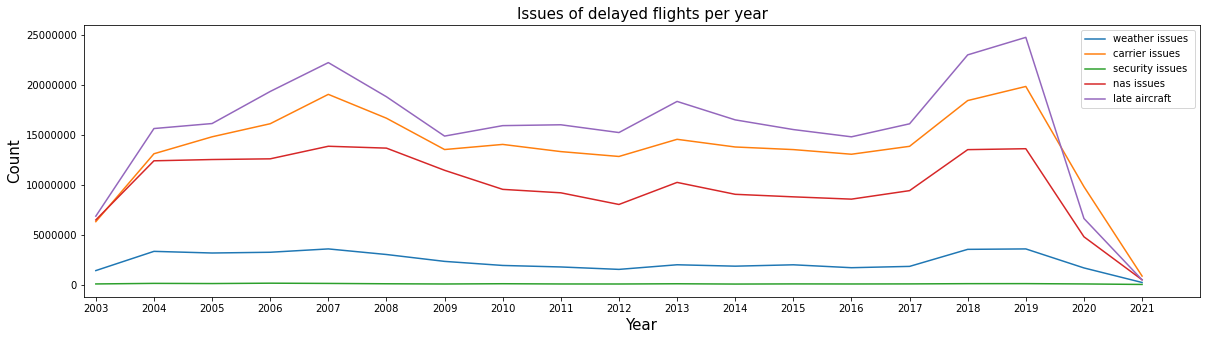

In [585]:
plt.subplots(figsize = (20,5))

# grouping weather issues by year and sub-plotting it 
flights_feature  = flights.groupby('year')['weather_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = 'weather_delay',label = 'weather issues ')

# grouping carrier issues by year  and sub-plotting it
flights_feature  = flights.groupby('year')[' carrier_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = ' carrier_delay',label = 'carrier issues ')

# grouping security issues by year and sub-plotting it 
flights_feature  = flights.groupby('year')['security_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = 'security_delay',label = 'security issues ')

# grouping NAS issues by year and sub-plotting it 
flights_feature  = flights.groupby('year')['nas_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = 'nas_delay',label = 'nas issues ')

# grouping late aircraft issues by year and sub-plotting it 
flights_feature  = flights.groupby('year')['late_aircraft_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = 'late_aircraft_delay',label = 'late aircraft')

# polishing the plot
# making the numbers on the y axis plain and not using scientific notations
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Count',fontsize = 15)
# setting x ticks to years starting from 2003 to 2021 with a step of 1 year
plt.xticks(range(2003,2022,1));
plt.xlim(2002.8,2022)
plt.xlabel('Year',fontsize = 15)
plt.title('Issues of delayed flights per year',fontsize = 15);
plt.legend();

### This plot shows that most delays happens because of late aircraft feature, and weather isnt the main feature causing delays

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a strong positive correlation between weather_count and weather_delay features,And same goes for nas_count with nas_delay and late_aircraft_count with late_aircraft_delay

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Yes, the late_aircraft feature was a big insight in my bivariate invetigation as i though weather would be the main reason for flight delays

## Multivariate Exploration

> first i am gonna plot a correlation heatmap to look for patterns

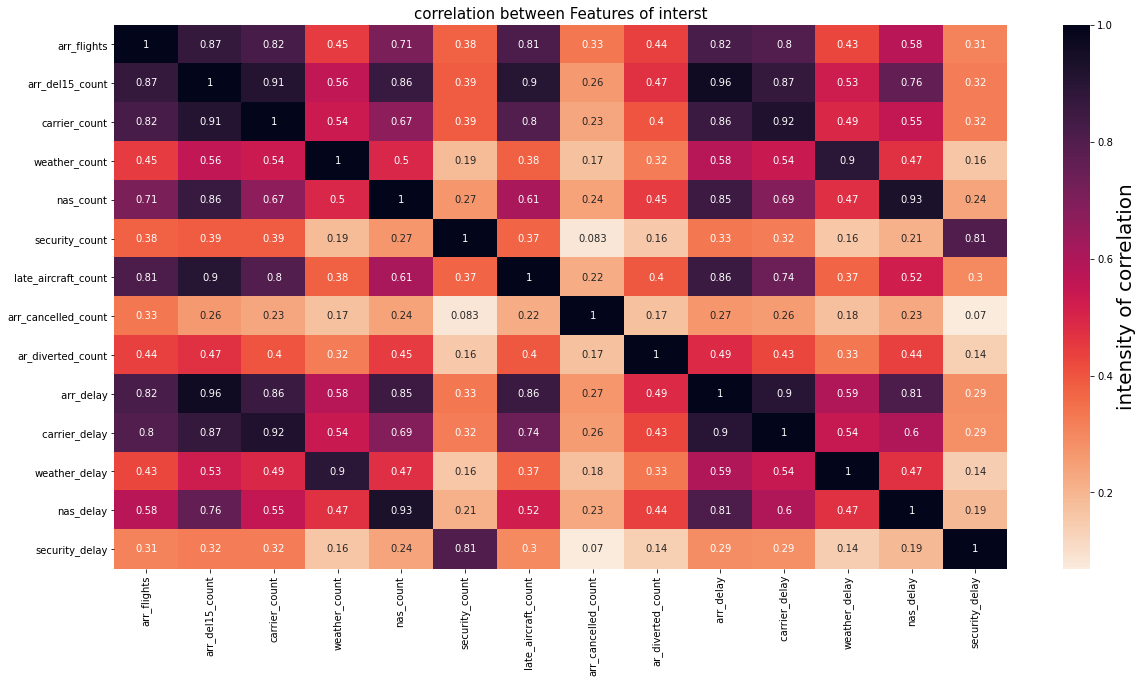

In [586]:
# setting fig size
plt.figure(figsize = (20,10))
# getting the features of interest and applying correlation function
flight_correlation = flights[flights.columns[6:-2]].corr()
# drawing heat map of correlation
ax = sb.heatmap(flight_correlation,annot = True,cmap = sb.cm.rocket_r,cbar_kws = {'label' : 'intensity of correlation'})
# setting color bar label size
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.title('correlation between Features of interst',fontsize = 15);

#### this correlation heatmap plot shows that there are high correlations between each delay feature with its coressponding count feature, Like weather delay with weather count, also the highest correlation in the arr_delay feature is with arr_del15_count column

 > Lets investigate the total number of flights cancelled in each month of each year

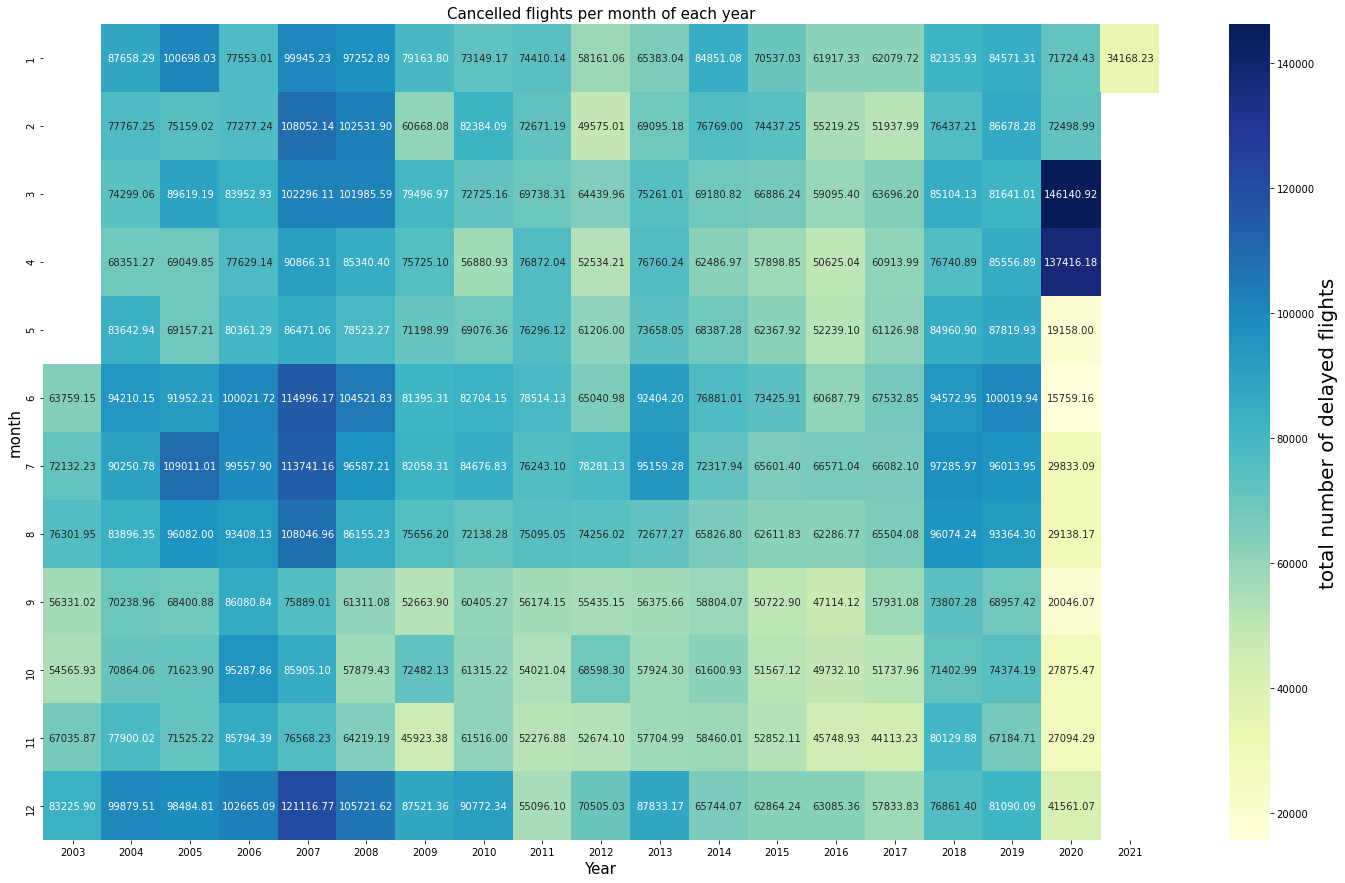

In [587]:
plt.figure(figsize = (25,15))
# creating a column with all the delays counts
flights['total_num_delayed'] = flights['carrier_count'] + flights['weather_count'] + flights['nas_count'] + flights['security_count'] + flights['late_aircraft_count'] + flights['arr_cancelled_count']
# grouping by each month of every year and summing the count
total_num_delayed = flights.groupby(['year',' month'])['total_num_delayed'].sum()
total_num_delayed = total_num_delayed.reset_index()
#setting the month to be  the index and each yer to be a single column and the values are the total count of delayed flights
total_num_delayed = total_num_delayed.pivot(index = ' month', columns = 'year', values ='total_num_delayed')
# plotting heatmap
ax = sb.heatmap(total_num_delayed,annot = True,fmt = '.2f',cmap = 'YlGnBu',cbar_kws = {'label' : 'total number of delayed flights'});
# setting color bar  label size and polishing the plot
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('month',fontsize = 15)
plt.title('Cancelled flights per month of each year',fontsize = 15);

### most cancelled flights happends in the start of the pandemic in march and april of 2020

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> i found strong correlation between each delay feature with its coressponding count feature which stengthened my bivariate matrix plot which i found the same strong positive correlation like weather_delay and weather_count

### Were there any interesting or surprising interactions between features?

> In the second plot there in the begining of the pandemic in march and april of 2020 has the highest number of delayed flights following them december 2007